# 01 Importing Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

In [3]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data Set

In [4]:
# import data set from 4.8
path = r'C:\Users\jakey\OneDrive\Documents\Data Analytics\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [5]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_task8.pkl'))

In [ ]:
# check the data file
ords_prods_m

# 03 Bar Graphs

<AxesSubplot:>

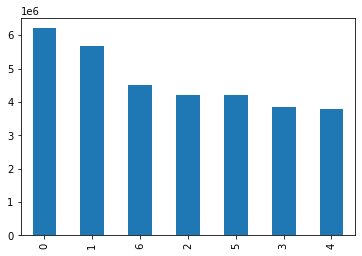

In [5]:
ords_prods_merge['order_day_of_the_week'].value_counts().plot.bar()

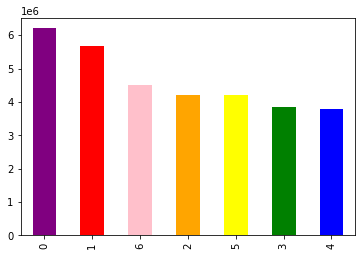

In [6]:
# adding colour but also renaming it for exporting purposes
bar = ords_prods_merge['order_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# exporting images
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04 Histograms

<AxesSubplot:ylabel='Frequency'>

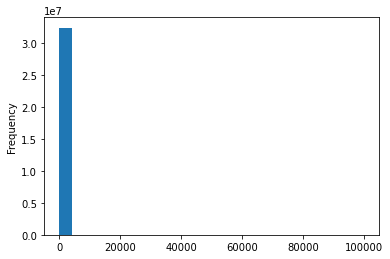

In [8]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

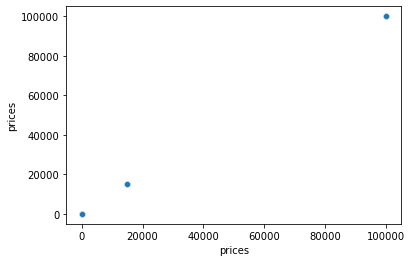

In [9]:
# scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
# check if any items are above the usual $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

product_id                      product_name  aisle_id  \
13100225       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100226       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100227       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100228       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100229       21553  Lowfat 2% Milkfat Cottage Cheese       108   
...              ...                               ...       ...   
21786968       33664             2 % Reduced Fat  Milk        84   
21786969       33664             2 % Reduced Fat  Milk        84   
21786970       33664             2 % Reduced Fat  Milk        84   
21786971       33664             2 % Reduced Fat  Milk        84   
21786972       33664             2 % Reduced Fat  Milk        84   

          department_id   prices  order_id  user_id  order_number  \
13100225             16  14900.0    912404       17            12   
13100226             16  14900.0    603376       17            22   
13100227             16  14900.0   3264360      135             2   
13100228             16  14900.0    892534      135             3   
13100229             16  14900.0    229704      342             8   
...                 ...      ...       ...      ...           ...   
21786968             16  99999.0   2249946   204099            29   
21786969             16  99999.0   2363282   204099            31   
21786970             16  99999.0   3181945   204395            13   
21786971             16  99999.0   2486215   205227             7   
21786972             16  99999.0   2232716   205227            10   

          order_day_of_the_week  order_hour_of_day  ...     price_range_loc  \
13100225                      2                 14  ...  High-range product   
13100226                      6                 16  ...  High-range product   
13100227                      2                 21  ...  High-range product   
13100228                      0                  8  ...  High-range product   
13100229                      1                 19  ...  High-range product   
...                         ...                ...  ...                 ...   
21786968                      0                  8  ...  High-range product   
21786969                      0                  9  ...  High-range product   
21786970                      3                 15  ...  High-range product   
21786971                      3                 20  ...  High-range product   
21786972                      0                 11  ...  High-range product   

             busiest_day     busiest_days  busiest_period_of_day max_order  \
13100225  Regularly busy   Regularly Busy            Most orders        40   
13100226  Regularly busy   Regularly Busy            Most orders        40   
13100227  Regularly busy   Regularly Busy         Average orders         4   
13100228     Busiest day     Busiest Days         Average orders         4   
13100229  Regularly busy     Busiest Days         Average orders        16   
...                  ...              ...                    ...       ...   
21786968     Busiest day     Busiest Days         Average orders        39   
21786969     Busiest day     Busiest Days            Most orders        39   
21786970  Regularly busy  Least Busy Days            Most orders        15   
21786971  Regularly busy  Least Busy Days         Average orders        12   
21786972     Busiest day     Busiest Days            Most orders        12   

              loyalty_flag    avg_price  spender_flag    order_frequency_flag  \
13100225  Regular customer   108.648299  High spender      Frequent customer.   
13100226  Regular customer   108.648299  High spender      Frequent customer.   
13100227      New customer  1154.792308  High spender       Regular customer.   
13100228      New customer  1154.792308  High spender       Regular customer.   
13100229  Regular customer   114.426619  High spender  Non-frequent custo

In [11]:
# turn these products into nans
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
# check to see if it worked
ords_prods_merge['prices'].max()

25.0

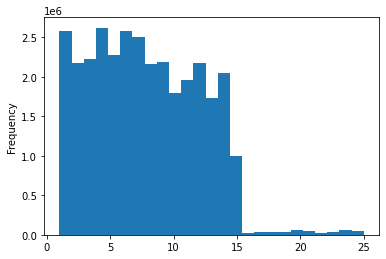

In [13]:
# redo the histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

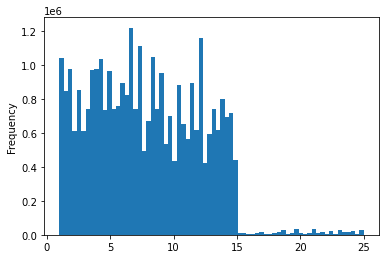

In [14]:
# increasing it to 70 bins
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
# exporting images
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_70bin_prices.png'))

In [16]:
# subset for a line graph
df = ords_prods_merge[:2000000]

In [17]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# store 70% in Big
big = ords_prods_merge[dev]

In [20]:
# store 30% in Small
small = ords_prods_merge[~dev]

In [21]:
# check to see if it worked
len(ords_prods_merge)

32406041

In [23]:
len(big) + len(small)

32406041

In [25]:
# make the df smaller
df_2 = small[['order_day_of_the_week','prices']]

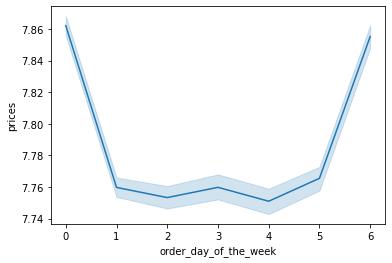

In [26]:
# make your plot
line = sns.lineplot(data = df_2, x = 'order_day_of_the_week',y = 'prices')

In [27]:
# checking against the entire dataframe
df_4 = ords_prods_merge[['order_day_of_the_week','prices']]

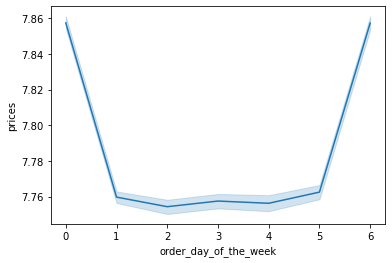

In [28]:
line_2 = sns.lineplot(data = df_4, x = 'order_day_of_the_week',y = 'prices')

In [1]:
print('hello')

hello
